In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Importing Libraries

In [2]:
NN_Train = pd.read_csv(r"C:\Users\shres\Desktop\Datasets\EMNIST Train.csv",header=None)
NN_Test = pd.read_csv(r"C:\Users\shres\Desktop\Datasets\EMNIST Test.csv",header=None)
#Reading and Conversion of CSV File to NumPy Array

In [3]:
NN_Train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
NN_Test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Scaled_Train = NN_Train.iloc[:,1:]/255 #Feature Scaling for Training and Testing Inputs
Scaled_Test = NN_Test.iloc[:,1:]/255

In [6]:
X1 = Scaled_Train.to_numpy()
X_Test1 = Scaled_Test.to_numpy()
print(X1.shape,"\n",X_Test1.shape)

(88800, 784) 
 (14800, 784)


In [7]:
IM = np.identity(26) #One-Hot Encoding / One vs All Multiclass Classifier
y_class = NN_Train.iloc[:,0]
y_list = []
for i in range(NN_Train.shape[0]) :
    a = y_class[i]-1
    y_list.append(IM[a,:])
Y1 = np.array(y_list)
print(Y1,'\n',Y1.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 (88800, 26)


In [8]:
X = X1.T #Taking appropriate shapes of the data for the algorithm
X_Test = X_Test1.T
Y = Y1.T
print(X.shape,X_Test.shape,Y.shape)

(784, 88800) (784, 14800) (26, 88800)


In [9]:
def neural_network(iterations,learning_rate,X,Y,X_Test): # 2 Layer Neural Network Function
    #Initialisation of Weights and Bias
    m = X.shape[1]
    n = X.shape[0]
    l = Y.shape[0]
    theta1 = 0.001*np.random.rand(n,l) 
    bias1 = np.random.rand(l,1)
    theta2 = 0.001*np.random.rand(l,l)
    bias2 = np.random.rand(l,1)
    for i in range(iterations):
        #Forward Propagation
        Z2 = np.dot(theta1.T,X) + bias1
        A2 = 1/(1+np.exp(-Z2)) #Sigmoid Function Acrtivation
        Z3 = np.dot(theta2.T,A2) + bias2
        A3 = 1/(1+np.exp(-Z3)) #Output Probabilities
        cost = (np.sum((Y)*np.log(A3)+(1-Y)*np.log(1-A3)))*(-1/m) #Cost Function
        #Backward propagation
        Del3 = (A3 - Y) * (A3 * (1-A3))
        Del2 = np.dot(theta2,Del3) * (A2 * (1-A2))
        #Computing Gradients
        dt1 = (1/m) * np.dot(Del2,X.T)
        dt2 = (1/m) * np.dot(Del3,A2.T)
        db1 = (1/m) * (np.sum(Del2,axis=1)).reshape(l,1)
        db2 = (1/m) * (np.sum(Del3,axis=1)).reshape(l,1)
        #Assigning New Parameters (Gradient Descent)
        theta1 = theta1 - dt1.T * learning_rate
        theta2 = theta2 - dt2.T * learning_rate
        bias1 = bias1 - db1 * learning_rate
        bias2 = bias2 - db2 * learning_rate
        if i%10 == 0 :
            print(i,cost)
        plt.scatter(i,cost) #Plotting Gradient Descent
    Y_T1 = np.dot(theta1.T,X_Test) + bias1
    Y_P1 = 1/(1+np.exp(-Y_T1)) #Sigmoid Activation for Testing Input
    Y_T2 = np.dot(theta2.T,Y_P1) + bias2
    Y_Prob = 1/(1+np.exp(-Y_T2)) #Testing Output Probabilities
    return Y_Prob

0 27.009798838631156
10 8.140550090227606
20 7.758982200686655
30 7.043438735794132
40 5.033144708036586
50 4.939023905093375
60 4.8227843587600505
70 4.6372732098537375
80 4.498672346865033
90 4.421792020241225
100 4.378338162447527
110 4.351383888642505
120 4.333117091560654
130 4.319800059648804
140 4.30951185732108
150 4.301199613539865
160 4.294249124657256
170 4.288278274418039
180 4.28303234842824
190 4.278327946599691
200 4.274020799249051
210 4.269985280142197
220 4.266098546576792
230 4.262223797179384
240 4.258188810073547
250 4.253763359410652
260 4.24865119202399
270 4.24251444365637
280 4.235036639973066
290 4.226013919914157
300 4.21543979939463
310 4.2035245274495345
320 4.190619731580017
330 4.177129176604533
340 4.163493368538761
350 4.1501694987858455
360 4.137513914868798
370 4.125656415058672
380 4.114493492019909
390 4.103785721349647
400 4.093269453891763
410 4.082727888251645
420 4.072013231905533
430 4.061032036049456
440 4.0497116426916495
450 4.03796480733825

,0,1,2,3,4,5,6,7,8,9,...,14790,14791,14792,14793,14794,14795,14796,14797,14798,14799
0,3.936915e-01,1.396563e-02,0.040200,0.062328,0.241036,0.214384,0.402266,0.570778,2.448197e-01,0.222423,...,0.028167,0.022084,0.108042,0.110476,0.049106,0.013674,0.037111,0.098857,0.007192,0.124028
1,1.454971e-02,1.321178e-02,0.000470,0.005055,0.089405,0.012911,0.015984,0.022867,1.811685e-03,0.446673,...,0.025367,0.115370,0.063556,0.044955,0.039468,0.006418,0.086237,0.123848,0.063878,0.000942
2,1.148549e-03,4.418886e-07,0.195163,0.007072,0.000025,0.000042,0.000243,0.000278,5.067555e-04,0.000006,...,0.035618,0.002652,0.021785,0.000053,0.016166,0.015849,0.002890,0.010284,0.002177,0.017834
3,1.773121e-04,5.196526e-02,0.000080,0.017438,0.005368,0.005264,0.001577,0.000285,1.645734e-04,0.164443,...,0.011108,0.087161,0.005647,0.001552,0.018088,0.007691,0.013319,0.024428,0.057820,0.017622
4,5.385626e-02,1.280176e-04,0.001204,0.000687,0.014028,0.001924,0.121433,0.060728,1.949676e-02,0.009454,...,0.001756,0.000471,0.005837,0.002782,0.001255,0.000188,0.001664,0.002712,0.000136,0.006085
5,2.263102e-01,4.797878e-03,0.000078,0.002494,0.013728,0.025734,0.002162,0.021726,2.247838e-02,0.020749,...,0.001543,0.001189,0.000909,0.012516,0.001142,0.000350,0.001200,0.002590,0.000637,0.000307
6,1.700054e-02,3.312403e-03,0.047718,0.076789,0.051436,0.063728,0.009709,0.121974,2.887950e-03,0.008628,...,0.085450,0.036388,0.058457,0.016070,0.109240,0.029258,0.072269,0.118123,0.062143,0.010839
7,1.437069e-02,9.599269e-02,0.001870,0.001963,0.181323,0.045904,0.003201,0.066589,7.037150e-03,0.151514,...,0.023146,0.040131,0.057501,0.216613,0.057766,0.014064,0.056772,0.027562,0.082332,0.000260
8,1.130477e-03,6.809052e-02,0.000229,0.000186,0.000510,0.000240,0.001833,0.011001,3.980329e-03,0.000877,...,0.003277,0.001157,0.001246,0.028682,0.001821,0.004376,0.004007,0.001306,0.002504,0.000564
9,8.189124e-07,1.398056e-03,0.017315,0.027201,0.000389,0.000026,0.000004,0.000024,9.190077e-07,0.000616,...,0.066436,0.288558,0.018552,0.004309,0.080320,0.276130,0.048657,0.020851,0.787870,0.000281


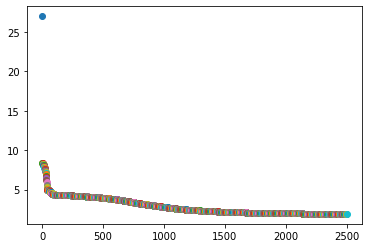

In [10]:
Y_Prob = neural_network(2500,6,X,Y,X_Test)
pd.DataFrame(Y_Prob)

In [12]:
Y_Pred1 = np.argmax(Y_Prob,axis=0) #Predicting the Alphabet
Y_Pred = Y_Pred1 + 1
pd.DataFrame(Y_Pred)

,0
0,1
1,24
2,3
3,21
4,1
...,...
14795,19
14796,19
14797,19
14798,10


In [13]:
Y_True = (NN_Test.iloc[:,0]).to_numpy() #Extracting Testing Output
pd.DataFrame(Y_True)

,0
0,1
1,1
2,1
3,1
4,1
...,...
14795,19
14796,19
14797,19
14798,19


In [14]:
Y_Diff=(Y_Pred-Y_True).tolist() #Taking Difference between Predicted and Actual Alphabet numbers
print(Y_Diff)

[0, 23, 2, 20, 0, 15, 0, 0, 0, 1, 13, 20, 2, 0, 13, 0, 4, 0, 10, 16, 3, 10, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 16, 3, 0, 0, 7, 0, 0, 0, 25, 0, 0, 20, 7, 0, 16, 20, 16, 0, 14, 3, 0, 2, 25, 13, 13, 0, 20, 0, 0, 16, 0, 0, 0, 7, 0, 16, 3, 0, 0, 0, 0, 1, 0, 16, 0, 3, 0, 14, 0, 0, 14, 16, 1, 2, 0, 16, 0, 20, 13, 16, 20, 3, 14, 14, 0, 0, 0, 3, 7, 1, 0, 1, 16, 0, 0, 12, 0, 0, 4, 3, 0, 0, 0, 0, 14, 7, 8, 0, 14, 23, 10, 0, 12, 0, 7, 14, 0, 0, 0, 3, 16, 0, 0, 0, 13, 0, 7, 0, 0, 6, 14, 14, 10, 0, 14, 1, 23, 0, 20, 16, 14, 0, 0, 20, 7, 0, 3, 7, 13, 0, 0, 22, 0, 0, 14, 0, 0, 0, 0, 0, 25, 0, 20, 0, 16, 8, 20, 0, 0, 0, 0, 3, 7, 15, 5, 13, 0, 10, 20, 1, 0, 0, 7, 0, 0, 0, 0, 1, 9, 0, 13, 0, 15, 10, 2, 14, 6, 14, 6, 14, 0, 23, 13, 0, 0, 5, 21, 12, 12, 0, 12, 7, 0, 0, 0, 12, 0, 16, 0, 0, 0, 16, 1, 23, 7, 13, 0, 20, 6, 22, 7, 6, 3, 0, 3, 18, 7, 0, 12, 0, 13, 10, 3, 0, 0, 7, 0, 0, 0, 10, 0, 0, 0, 0, 0, 6, 20, 0, 12, 0, 0, 0, 16, 0, 0, 0, 13, 3, 14, 22, 12, 0, 25, 0, 0, 13, 2, 18, 0, 13, 0, 13, 23, 0, 0, 0, 10

In [16]:
Correct = Y_Diff.count(0) #If the letter is correctly predicted the difference will be 0
Correct

10049

In [18]:
Accuracy = (Correct/NN_Test.shape[0])*100 #Accuracy
Accuracy

67.89864864864865

In [ ]:
# LR = 3 Acc = 31.9
# LR = 5.5 Acc = 49
# LR = 9 Acc = 5.4
# LR = 6 Acc = 50.574 , 67.8986